In [1]:
from storms import geomagnetic_storm_data
# from ace import open_ace
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from newell import newell_coupling

In [2]:
may10_df, may10_shock = geomagnetic_storm_data('2024-05-10', 'both', before_shock=6, after_shock=24, shock_thresholds=(5, 50))
oct29_df, oct29_shock = geomagnetic_storm_data('2003-10-29', 'ace', before_shock=6, after_shock=24, shock_thresholds=(10, 100))

/Users/jimtang/miniconda3/envs/historical-solar-wind-env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/Users/jimtang/Dev/historical-solar-wind/storms.py:64: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Rate_of_Change"] = df[column].pct_change() * 100  # Convert to percentage


In [3]:
oct29_df, oct29_shock

(                       bt   bx   by   bz  density  speed  temperature
 datetime                                                             
 2003-10-28 23:59:00   9.5  5.2  1.9 -7.7     61.0  282.3      88500.0
 2003-10-29 00:00:00   9.4  4.4  3.2 -7.7     59.8  282.2      83800.0
 2003-10-29 00:01:00   9.3  5.7  3.4 -6.6     62.7  282.4      87500.0
 2003-10-29 00:02:00   9.2  5.6  5.7 -4.5     61.7  282.4      86800.0
 2003-10-29 00:03:00   9.2  4.2  6.1 -5.4     62.1  282.0      84100.0
 ...                   ...  ...  ...  ...      ...    ...          ...
 2003-10-30 05:55:00  11.0  7.1  7.4  3.9      7.5  280.9      72500.0
 2003-10-30 05:56:00  10.9  7.0  7.4  4.0      3.4  259.0      32000.0
 2003-10-30 05:57:00  10.9  7.1  7.4  3.8      8.2  282.3     103000.0
 2003-10-30 05:58:00  10.9  7.3  7.3  3.5      6.3  268.1      49300.0
 2003-10-30 05:59:00  10.9  6.8  7.5  4.0      8.5  280.4      81900.0
 
 [1801 rows x 7 columns],
 Timestamp('2003-10-29 05:59:00'))

In [4]:
may10_tindex = (may10_df.index - may10_shock).total_seconds() / 3600
oct29_tindex = (oct29_df.index - oct29_shock).total_seconds() / 3600

Text(17.5, -50, 'By Jim Tang (@wxmann)')

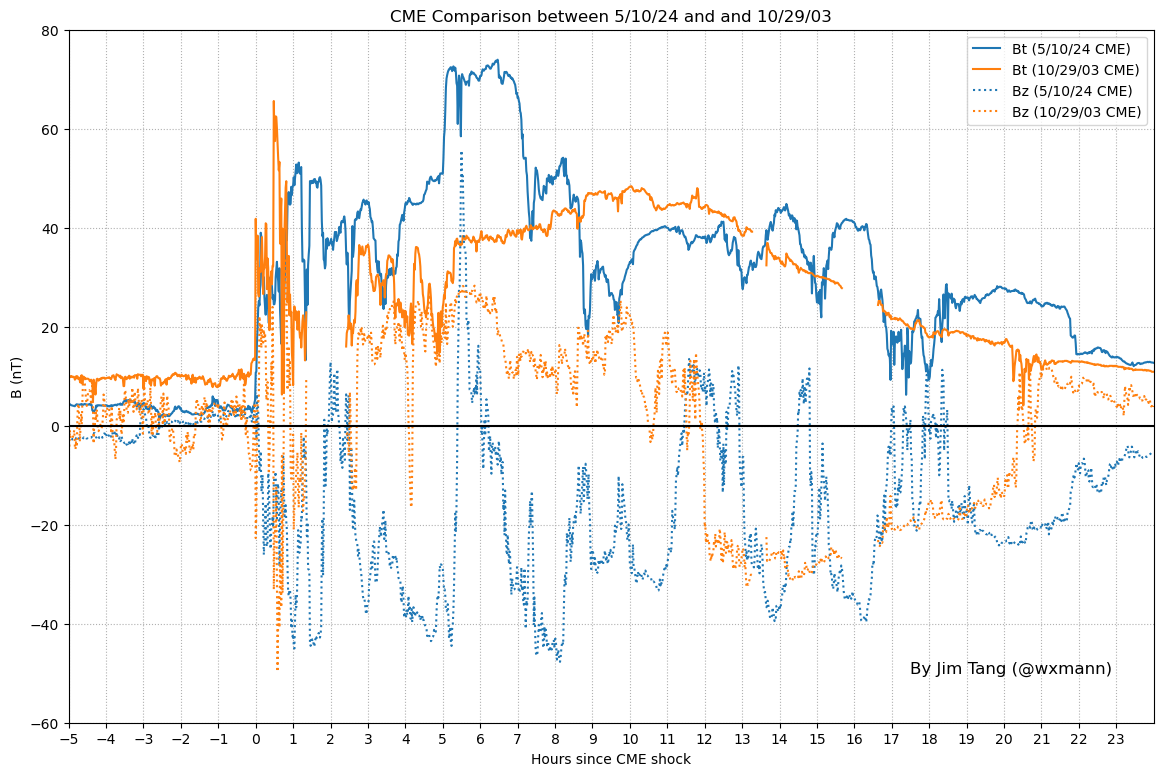

In [5]:
fig = plt.figure(figsize=(14, 9))
plt.plot(may10_tindex, may10_df.bt, label='Bt (5/10/24 CME)')
plt.plot(oct29_tindex, oct29_df.bt, label='Bt (10/29/03 CME)')
plt.plot(may10_tindex, may10_df.bz, 'C0:', label='Bz (5/10/24 CME)')
plt.plot(oct29_tindex, oct29_df.bz, 'C1:', label='Bz (10/29/03 CME)')

plt.axhline(y=0, c='k')
plt.xticks(range(-6, 24, 1))
plt.grid(axis='x', ls=':')
plt.grid(axis='y', ls=':')
plt.ylim([-60, 80])
plt.xlim([-5, 24])
plt.xlabel('Hours since CME shock')
plt.ylabel('B (nT)')
plt.legend()
plt.title('CME Comparison between 5/10/24 and and 10/29/03')
plt.text(17.5, -50, 'By Jim Tang (@wxmann)', fontdict=dict(fontsize=12))

Text(0, 0.5, 'Speed (km/s)')

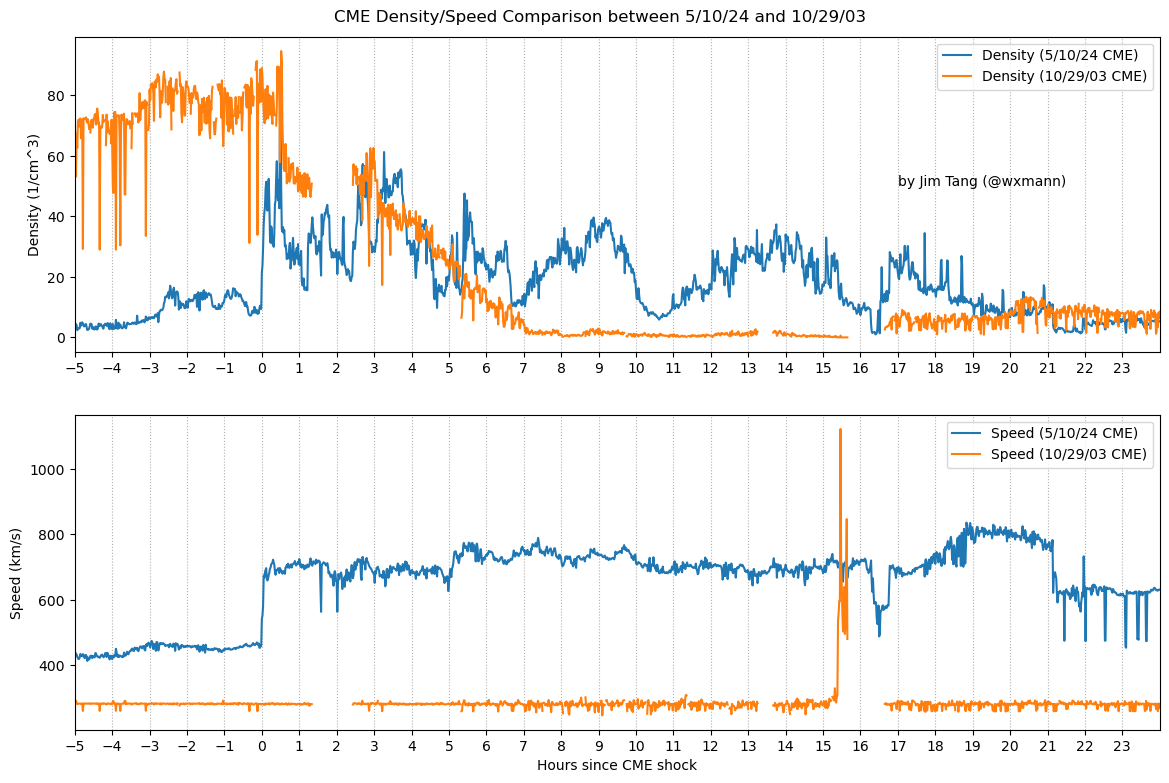

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 9))
ax1.plot(may10_tindex, may10_df.density, label='Density (5/10/24 CME)')
ax1.plot(oct29_tindex, oct29_df.density, label='Density (10/29/03 CME)')
ax2.plot(may10_tindex, may10_df.speed, label='Speed (5/10/24 CME)')
ax2.plot(oct29_tindex, oct29_df.speed, label='Speed (10/29/03 CME)')
# plt.plot(may10_tindex, may10_df.by, 'C0--', label='By (5/10 CME)')
# plt.plot(oct10_tindex, oct10_df.by, 'C1--', label='By (5/10 CME)')

plt.suptitle('CME Density/Speed Comparison between 5/10/24 and 10/29/03', y=0.91)
plt.xlabel('Hours since CME shock')

for ax in (ax1, ax2):
    ax.set_xticks(range(-5, 24, 1))
    ax.grid(axis='x', ls=':')
    ax.set_xlim(-5, 24)
    ax.legend()
    
ax1.text(17, 50, 'by Jim Tang (@wxmann)')
ax1.set_ylabel('Density (1/cm^3)')
ax2.set_ylabel('Speed (km/s)') 

Text(23.7, 275, 'W')

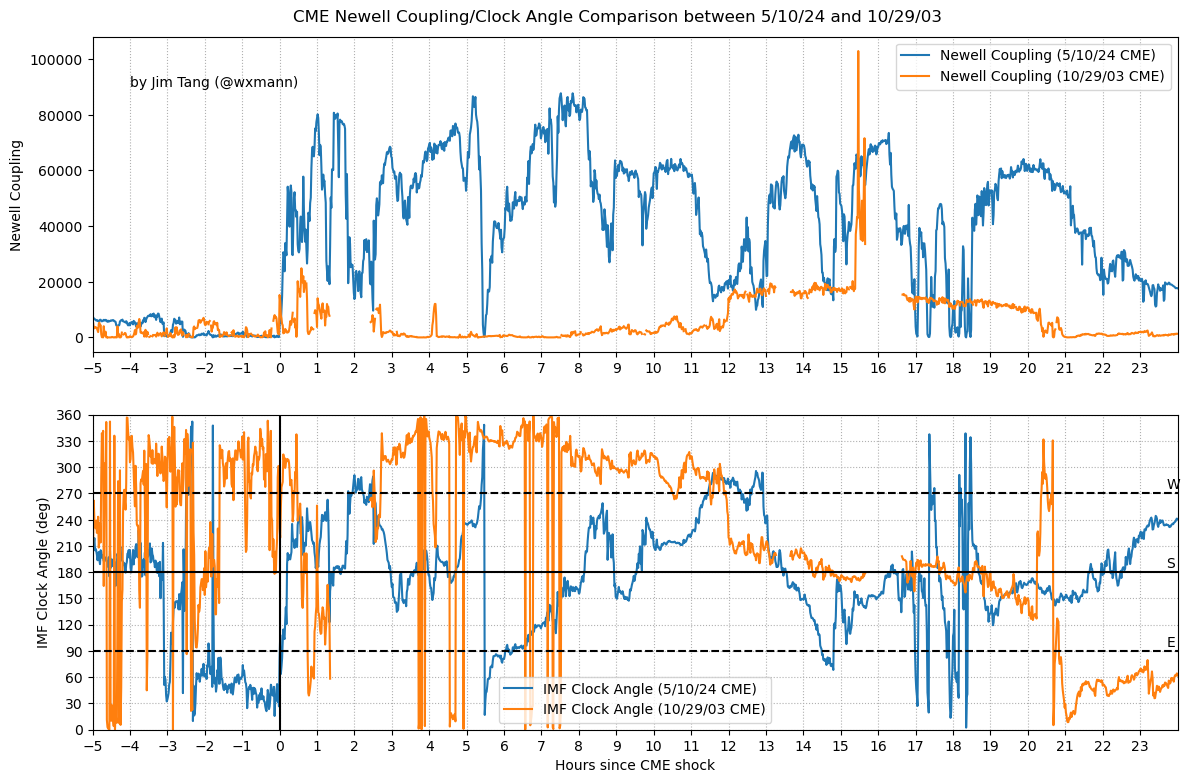

In [7]:
may10_newell = newell_coupling(may10_df.by, may10_df.bz, may10_df.speed)
may10_phi = np.arctan2(may10_df.by, may10_df.bz)
may10_phi = np.rad2deg(may10_phi)
may10_phi[may10_phi < 0] = 360 + may10_phi

oct29_newell = newell_coupling(oct29_df.by, oct29_df.bz, oct29_df.speed)
oct29_phi = np.arctan2(oct29_df.by, oct29_df.bz)
oct29_phi = np.rad2deg(oct29_phi)
oct29_phi[oct29_phi < 0] = 360 + oct29_phi

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 9))

ax1.plot(may10_tindex, may10_newell, label='Newell Coupling (5/10/24 CME)')
ax1.plot(oct29_tindex, oct29_newell, label='Newell Coupling (10/29/03 CME)')
ax2.plot(may10_tindex, may10_phi, label='IMF Clock Angle (5/10/24 CME)')
ax2.plot(oct29_tindex, oct29_phi, label='IMF Clock Angle (10/29/03 CME)')

plt.suptitle('CME Newell Coupling/Clock Angle Comparison between 5/10/24 and 10/29/03', y=0.91)
plt.xlabel('Hours since CME shock')

for ax in (ax1, ax2):
    ax.set_xticks(range(-5, 24, 1))
    ax.grid(axis='x', ls=':')
    ax.set_xlim(-5, 24)
    ax.legend()
    
ax1.text(-4, 90000, 'by Jim Tang (@wxmann)')
ax1.set_ylabel('Newell Coupling')
ax2.set_ylabel('IMF Clock Angle (deg)') 
ax2.set_ylim([0, 360])
# ax2.set_yticks(np.arange(-180, 180 + 1, 30))
ax2.set_yticks(np.arange(0, 361, 30))
ax2.grid(axis='y', ls=':')
ax2.axvline(x=0, c='k')

ax2.axhline(y=180, c='k')
ax2.text(23.7, 185, 'S')
ax2.axhline(y=90, c='k', ls='--')
ax2.text(23.7, 95, 'E')
ax2.axhline(y=270, c='k', ls='--')
ax2.text(23.7, 275, 'W')

Text(23.7, 275, 'W')

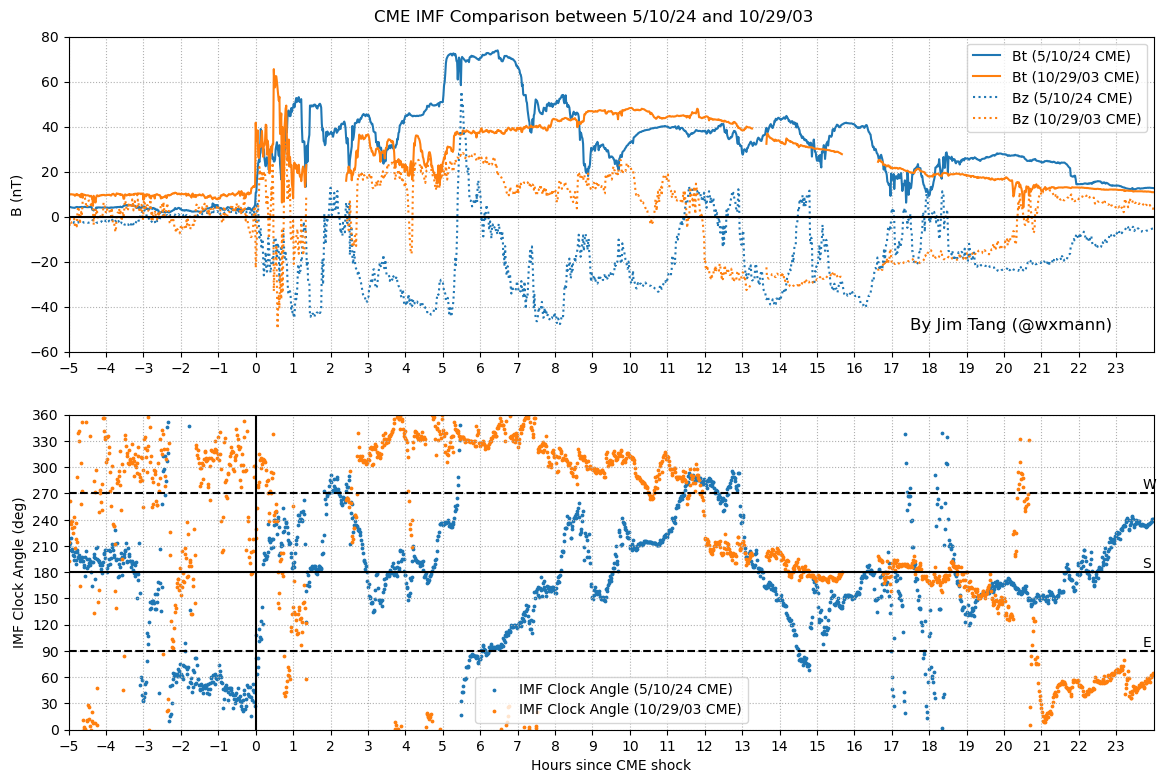

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 9))

plt.suptitle('CME IMF Comparison between 5/10/24 and 10/29/03', y=0.91)
plt.xlabel('Hours since CME shock')

ax1.plot(may10_tindex, may10_df.bt, label='Bt (5/10/24 CME)')
ax1.plot(oct29_tindex, oct29_df.bt, label='Bt (10/29/03 CME)')
ax1.plot(may10_tindex, may10_df.bz, 'C0:', label='Bz (5/10/24 CME)')
ax1.plot(oct29_tindex, oct29_df.bz, 'C1:', label='Bz (10/29/03 CME)')

ax2.scatter(may10_tindex, may10_phi, label='IMF Clock Angle (5/10/24 CME)', s=3)
ax2.scatter(oct29_tindex, oct29_phi, label='IMF Clock Angle (10/29/03 CME)', s=3)

for ax in (ax1, ax2):
    ax.set_xticks(range(-5, 24, 1))
    ax.grid(axis='x', ls=':')
    ax.set_xlim(-5, 24)
    ax.legend()

ax1.axhline(y=0, c='k')
# ax1.set_xticks(range(-6, 24, 1))
ax1.grid(axis='y', ls=':')
ax1.set_ylim([-60, 80])
ax1.set_ylabel('B (nT)')
ax1.text(17.5, -50, 'By Jim Tang (@wxmann)', fontdict=dict(fontsize=12))

ax2.set_ylabel('IMF Clock Angle (deg)') 
ax2.set_ylim([0, 360])
# ax2.set_yticks(np.arange(-180, 180 + 1, 30))
ax2.set_yticks(np.arange(0, 361, 30))
ax2.grid(axis='y', ls=':')
ax2.axvline(x=0, c='k')

ax2.axhline(y=180, c='k')
ax2.text(23.7, 185, 'S')
ax2.axhline(y=90, c='k', ls='--')
ax2.text(23.7, 95, 'E')
ax2.axhline(y=270, c='k', ls='--')
ax2.text(23.7, 275, 'W')